<a href="https://colab.research.google.com/github/ajaykumar080286/MachineLearning/blob/main/Gradient_boosting_step_by_step.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor, plot_tree

In [91]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

In [92]:
df=pd.DataFrame()

In [93]:
df['X']=X.reshape(100)
df['y']=y

Text(0.5, 1.0, 'X vs y')

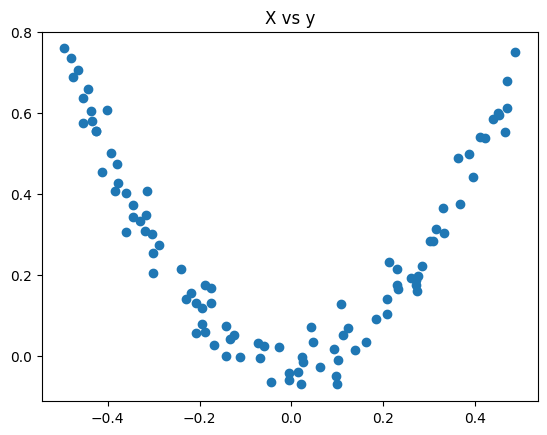

In [94]:
plt.scatter(df['X'], df['y'])
plt.title('X vs y')

In [95]:
df['pred1']=df['X'].mean()

In [96]:
df

,X,y,pred1
0,-0.125460,0.051573,-0.029819
1,0.450714,0.594480,-0.029819
2,0.231994,0.166052,-0.029819
3,0.098658,-0.070178,-0.029819
4,-0.343981,0.343986,-0.029819
...,...,...,...
95,-0.006204,-0.040675,-0.029819
96,0.022733,-0.002305,-0.029819
97,-0.072459,0.032809,-0.029819
98,-0.474581,0.689516,-0.029819


In [97]:
df['res11']=df['y']-df['pred1']

In [98]:
df

,X,y,pred1,res11
0,-0.125460,0.051573,-0.029819,0.081392
1,0.450714,0.594480,-0.029819,0.624299
2,0.231994,0.166052,-0.029819,0.195871
3,0.098658,-0.070178,-0.029819,-0.040359
4,-0.343981,0.343986,-0.029819,0.373805
...,...,...,...,...
95,-0.006204,-0.040675,-0.029819,-0.010856
96,0.022733,-0.002305,-0.029819,0.027515
97,-0.072459,0.032809,-0.029819,0.062628
98,-0.474581,0.689516,-0.029819,0.719335


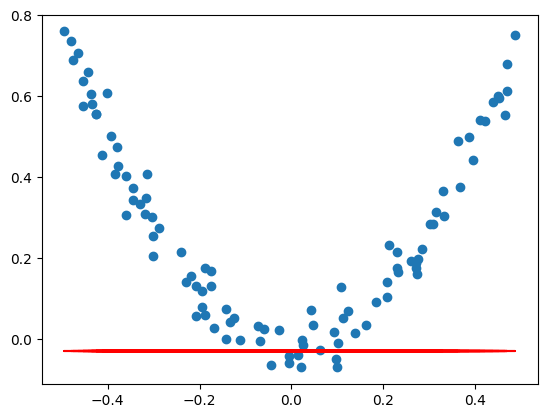

In [99]:
plt.scatter(df['X'], df['y'])
plt.plot(df['X'], df['pred1'], color='red')

In [100]:
df['res11'].values.shape

(100,)

**For Module 2 -> Create Decison tree**

In [101]:
tree1=DecisionTreeRegressor(max_leaf_nodes=8)

In [102]:
tree1.fit(df['X'].values.reshape(100,1), df['res11'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

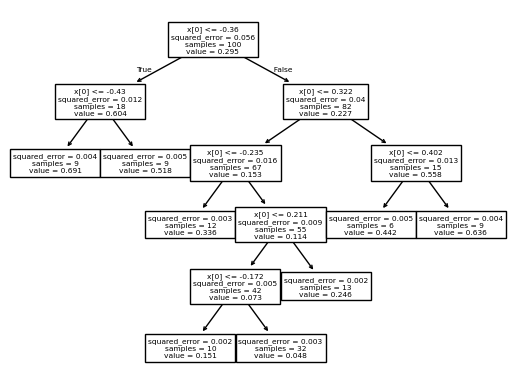

In [103]:
plot_tree(tree1)
plt.show()

In [123]:
X_test=np.linspace(-0.5,0.5,500)

y_pred=-0.029819+tree1.predict(X_test.reshape(500,1))

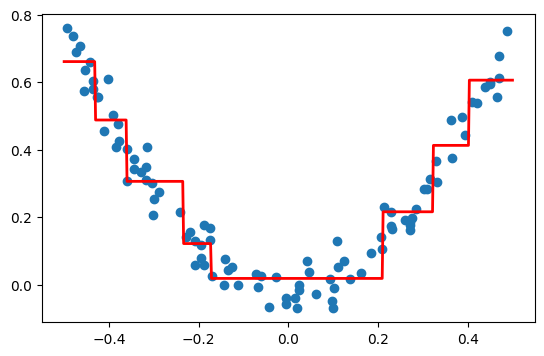

In [124]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_test, y_pred, linewidth=2,color='red')
plt.scatter(df['X'],df['y'])

In [125]:
df['pred2']=-0.029819+tree1.predict(df['X'].values.reshape(100,1))

In [126]:
df

,X,y,pred1,res11,pred2
0,-0.125460,0.051573,-0.029819,0.081392,0.018320
1,0.450714,0.594480,-0.029819,0.624299,0.605884
2,0.231994,0.166052,-0.029819,0.195871,0.215784
3,0.098658,-0.070178,-0.029819,-0.040359,0.018320
4,-0.343981,0.343986,-0.029819,0.373805,0.305965
...,...,...,...,...,...
95,-0.006204,-0.040675,-0.029819,-0.010856,0.018320
96,0.022733,-0.002305,-0.029819,0.027515,0.018320
97,-0.072459,0.032809,-0.029819,0.062628,0.018320
98,-0.474581,0.689516,-0.029819,0.719335,0.660913


In [127]:
df['res2']=df['y']-df['pred2']

In [128]:
df

,X,y,pred1,res11,pred2,res2
0,-0.125460,0.051573,-0.029819,0.081392,0.018320,0.033253
1,0.450714,0.594480,-0.029819,0.624299,0.605884,-0.011404
2,0.231994,0.166052,-0.029819,0.195871,0.215784,-0.049733
3,0.098658,-0.070178,-0.029819,-0.040359,0.018320,-0.088498
4,-0.343981,0.343986,-0.029819,0.373805,0.305965,0.038021
...,...,...,...,...,...,...
95,-0.006204,-0.040675,-0.029819,-0.010856,0.018320,-0.058995
96,0.022733,-0.002305,-0.029819,0.027515,0.018320,-0.020625
97,-0.072459,0.032809,-0.029819,0.062628,0.018320,0.014489
98,-0.474581,0.689516,-0.029819,0.719335,0.660913,0.028603


**Tree 3 Decision tee**

In [129]:
tree3=DecisionTreeRegressor(max_leaf_nodes=8)

In [131]:
tree3.fit(df['X'].values.reshape(100,1), df['res2'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

In [132]:
y_pred1=-0.029819+sum(regressor.predict(X_test.reshape(500,1)) for regressor in [tree1,tree3])

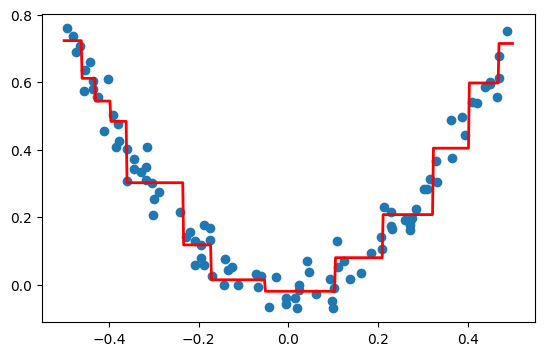

In [133]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_test, y_pred1, linewidth=2,color='red')
plt.scatter(df['X'],df['y'])

In [134]:
df['pred3']=-0.029819+sum(regressor.predict(df['X'].values.reshape(100,1)) for regressor in [tree1,tree3])

In [135]:
df

,X,y,pred1,res11,pred2,res2,pred3
0,-0.125460,0.051573,-0.029819,0.081392,0.018320,0.033253,0.014321
1,0.450714,0.594480,-0.029819,0.624299,0.605884,-0.011404,0.597523
2,0.231994,0.166052,-0.029819,0.195871,0.215784,-0.049733,0.207423
3,0.098658,-0.070178,-0.029819,-0.040359,0.018320,-0.088498,-0.019811
4,-0.343981,0.343986,-0.029819,0.373805,0.305965,0.038021,0.301966
...,...,...,...,...,...,...,...
95,-0.006204,-0.040675,-0.029819,-0.010856,0.018320,-0.058995,-0.019811
96,0.022733,-0.002305,-0.029819,0.027515,0.018320,-0.020625,-0.019811
97,-0.072459,0.032809,-0.029819,0.062628,0.018320,0.014489,0.014321
98,-0.474581,0.689516,-0.029819,0.719335,0.660913,0.028603,0.722987


In [136]:
df['res3']=df['y']-df['pred3']

In [137]:
df

,X,y,pred1,res11,pred2,res2,pred3,res3
0,-0.125460,0.051573,-0.029819,0.081392,0.018320,0.033253,0.014321,0.037252
1,0.450714,0.594480,-0.029819,0.624299,0.605884,-0.011404,0.597523,-0.003043
2,0.231994,0.166052,-0.029819,0.195871,0.215784,-0.049733,0.207423,-0.041371
3,0.098658,-0.070178,-0.029819,-0.040359,0.018320,-0.088498,-0.019811,-0.050367
4,-0.343981,0.343986,-0.029819,0.373805,0.305965,0.038021,0.301966,0.042020
...,...,...,...,...,...,...,...,...
95,-0.006204,-0.040675,-0.029819,-0.010856,0.018320,-0.058995,-0.019811,-0.020864
96,0.022733,-0.002305,-0.029819,0.027515,0.018320,-0.020625,-0.019811,0.017506
97,-0.072459,0.032809,-0.029819,0.062628,0.018320,0.014489,0.014321,0.018488
98,-0.474581,0.689516,-0.029819,0.719335,0.660913,0.028603,0.722987,-0.033472
